In [3]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Sitola seminar 2019</footer>

## Variance decomposition

- in ANOVA we study different factors and their interactions
- single factor means marginalize out all other dependancies

## Bias - variance tradeoff


- increasing model complexity to remove systematic residuals
- uncertainties of parameters rise fast due to **correlations**

## Design of experiments

full and partial "designs"

see for example
https://newonlinecourses.science.psu.edu/stat503/

## Simple 4th order polynom

we try to model data with set of polynomes of type $\sum_{i=0}^n a_i x^i$ with increasing degree $n$

true values correspond to 4-th order polynom (quadratic term dominates)

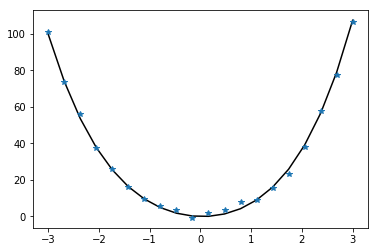

In [4]:
x=np.r_[-3:3:20j]
sigy=3.
tres=[0.5,0.2,7,-0.5,0] #skutecne parametry
ytrue=np.polyval(tres,x)
pl.plot(x,ytrue,'k')
y=ytrue+np.random.normal(0,sigy,size=x.shape)
pl.plot(x,y,'*')

### Statistical significance of parameters

**t-values** for *null-hypothesis* of individual parameters (polynomial coefficients)



In [12]:
errs=[[round(p,5) for p in np.sqrt(r[1].diagonal()[::-1])/sigy] for r in res]
text=["   ".join(["%6.3f"%p for p in abs(res[i][0][::-1]/np.array(errs[i]))]) for i in range(len(res))]
for i in range(1,len(text)+1):
    print("order %i:"%i,text[i-1])

order 1: 12.133    0.278
order 2:  6.064    2.077   88.865
order 3:  5.938    0.902   87.027    1.861
order 4:  5.322    2.799   43.929    5.777   33.124
order 5:  5.207    0.107   42.980    0.735   32.424    1.997
order 6:  5.885    0.107   15.926    0.732    8.337    1.986    2.810
order 7:  5.994    2.770   16.221    3.601    8.491    3.816    2.864    3.562
order 8:  5.360    2.636    7.489    3.426    2.986    3.631    1.024    3.389    0.701
order 9:  5.199    3.256    7.264    3.284    2.896    2.837    0.994    2.376    0.680    2.050


significant values at higher order coefficients

In [8]:
ords=np.arange(1,10)
res=[np.polyfit(x,y,i,cov=True) for i in ords]
#[[round(p,3) for p in r[0][::-1]] for r in res]
text=["   ".join(["%6.3f"%p for p in r[0][::-1]]) for r in res]
for i in range(1,len(text)+1):
    print("order %i:"%i,text[i-1])

order 1: 33.474    0.421
order 2: -3.367    0.421   11.111
order 3: -3.367   -0.471   11.111    0.150
order 4:  1.220   -0.471    6.445    0.150    0.552
order 5:  1.220    0.033    6.445   -0.091    0.552    0.022
order 6:  1.626    0.033    5.560   -0.091    0.826    0.022   -0.021
order 7:  1.626    1.278    5.560   -1.266    0.826    0.292   -0.021   -0.017
order 8:  1.733    1.278    5.149   -1.266    1.066    0.292   -0.065   -0.017    0.002
order 9:  1.733    2.303    5.149   -2.894    1.066    0.977   -0.065   -0.122    0.002    0.005


## Principal component analysis

- "ultimate correlation tool" (C.R.Jenkins) - transforming into space of orthogonal directions

- first component $a_1 X$ to maximize variance in chosen direction $a_1$
- next 

![2variables](http://is.muni.cz/el/1431/podzim2018/FX003/um/prezen/images/pca_2var.png)

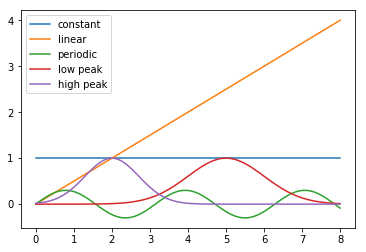

In [1]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np
x=np.r_[0:8:100j]
fun=[np.ones_like(x),0.5*x]#0.05*x**2]
fun.append(0.3*np.sin(x*2.))
fun.append(np.exp(-(x-5)**2/2.))
fun.append(np.exp(-(x-2)**2))
nmeas=20
[pl.plot(x,f) for f in fun]
pl.legend(["constant","linear","periodic","low peak","high peak"])
allpars=np.array([np.random.normal(a,0.4*abs(a),size=nmeas) for a in [3,-1,1.5,2,3.1]]) #sada ruznych koefientu jednotlivych komponent

we have 20 sets of parameters, generate combination of basic functions and add some gaussian noise

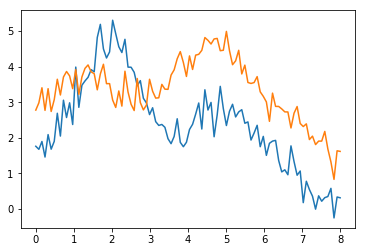

In [3]:
testfunc=allpars.T.dot(fun)
for i in range(len(testfunc)):
    testfunc[i]+=np.random.normal(0,0.3,size=len(x))
pl.plot(x,testfunc[3])
pl.plot(x,testfunc[1]);

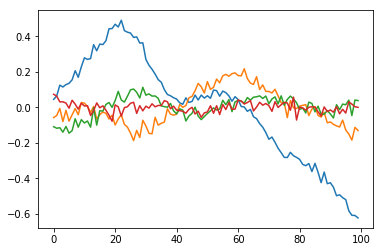

In [4]:
renfunc=testfunc-testfunc.mean(1)[:,np.newaxis]
renfunc/=np.sqrt((renfunc**2).sum(1))[:,np.newaxis]
cormat10=renfunc[:10].dot(renfunc[:10].T)
eig10,vecs10=np.linalg.eig(cormat10)
#eig10
prinfunc=vecs10.T.dot(renfunc[:10])
[pl.plot(p) for p in prinfunc[:4]];

## Interactive histograms

In [ ]:
import nbinteract as nbi
def empirical_props(num_plants):
    return none
opts = {'title': 'Distribution of sample proportions',
    'xlabel': 'Sample Proportion','ylabel': 'Percent per unit',
    'xlim': (0.64, 0.84),'ylim': (0, 25), 'bins': 20,}
nbi.hist(empirical_props, options=opts,
         num_plants=widgets.ToggleButtons(options=[100, 200, 400, 800]))